In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

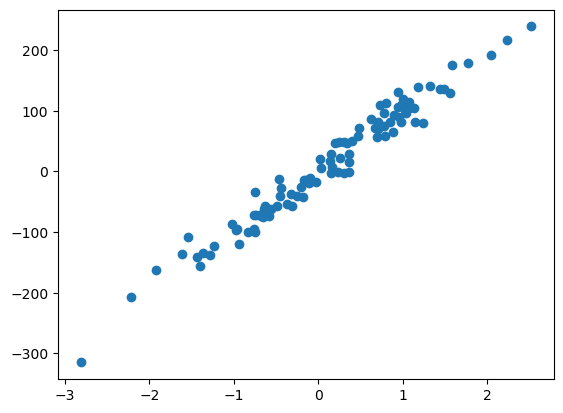

In [3]:
plt.scatter(X,y)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
lr.coef_

array([98.78278329])

In [49]:
lr.intercept_

-1.187390379136513

In [51]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9455845385895916

In [10]:
m = 33.62

In [30]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)
            
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m*X + self.b

In [31]:
gd = GDRegressor(0.01,10)    # if we observed zigzac pattern in the solution then decrease the learning rate and inc the 
                                # epochs that is iterations

In [32]:
gd.fit(X,y)

-591.5740957816863 -716.2191265884703


In [33]:
gd = GDRegressor(0.001,50)     # if we observed zigzac pattern in the solution then decrease the learning rate and inc the 
                                # epochs that is iterations

In [52]:
gd.fit(X_train,y_train)

98.81097717568812 -1.2223034749959156


In [16]:
# Now we are very close to our b(intercept).

In [53]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.945541687118571